<a href="https://colab.research.google.com/github/YaduSM001/Datascience-assignment/blob/main/Casestudy_on_Supervised_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis (EDA)**


In [456]:
#importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [457]:
df = pd.read_csv('/content/Testing_data.csv')
df_test = pd.read_csv('/content/Testing_data.csv')

In [458]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [459]:
df.shape

(1409, 21)

In [460]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
664,5688-KZTSN,Male,0,Yes,Yes,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.00,288.05,Yes
855,1455-ESIQH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.1,Yes
1255,0219-QAERP,Male,0,Yes,No,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,576.65,No
941,8647-SDTWQ,Male,0,Yes,Yes,57,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,No
575,4011-ARPHK,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,50.35,1411.35,No


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [462]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", float('nan')).astype(float)
df_test['TotalCharges'] = df_test['TotalCharges'].replace(" ", float('nan')).astype(float)


In [463]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


## **Data Preprocessing**

In [464]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [465]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0], inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].mode()[0], inplace=True)

In [466]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [467]:
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)

In [468]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [469]:
df_test.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [470]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1409.000000,1409.000000,1409.000000,1409.000000
mean,0.171753,31.428673,63.898013,2212.309546
std,0.377300,24.322161,30.282693,2243.359506
min,0.000000,0.000000,18.700000,18.800000
25%,0.000000,8.000000,30.100000,355.900000
50%,0.000000,27.000000,69.900000,1347.150000
75%,0.000000,54.000000,89.500000,3673.600000
max,1.000000,72.000000,118.600000,8547.150000


In [471]:
df.duplicated().sum()

0

In [472]:
for col in df.columns:
  unique_vals = df[col].unique()
  print(f"Column '{col}':")
  print(unique_vals)
  print(f"Total unique values: {len(unique_vals)}")
  print("-" * 20)


Column 'customerID':
['6080-TCMYC' '7285-KLOTR' '7486-KSRVI' ... '5570-PTWEH' '1722-LDZJS'
 '5921-NGYRH']
Total unique values: 1409
--------------------
Column 'gender':
['Male' 'Female']
Total unique values: 2
--------------------
Column 'SeniorCitizen':
[0 1]
Total unique values: 2
--------------------
Column 'Partner':
['Yes' 'No']
Total unique values: 2
--------------------
Column 'Dependents':
['Yes' 'No']
Total unique values: 2
--------------------
Column 'tenure':
[40 12 43 72 10 29 66 39 28  1 34 58 47 64 38 15 46 30 70  2 19 20 45 26
  8  3 48  6 71 17  4 16 25 18  7 31 53 50 24 32 27 69  9  5 62 21 14 11
 35 60 67 13 57 22 59 52 23 49 61 65 37 63 51 68 41 54 55 42 44 56 36  0
 33]
Total unique values: 73
--------------------
Column 'PhoneService':
['Yes' 'No']
Total unique values: 2
--------------------
Column 'MultipleLines':
['Yes' 'No phone service' 'No']
Total unique values: 3
--------------------
Column 'InternetService':
['Fiber optic' 'DSL' 'No']
Total unique values: 3

In [473]:
df = df.drop('customerID', axis=1)
df_test = df_test.drop('customerID', axis=1)

## **Feature Engineering**

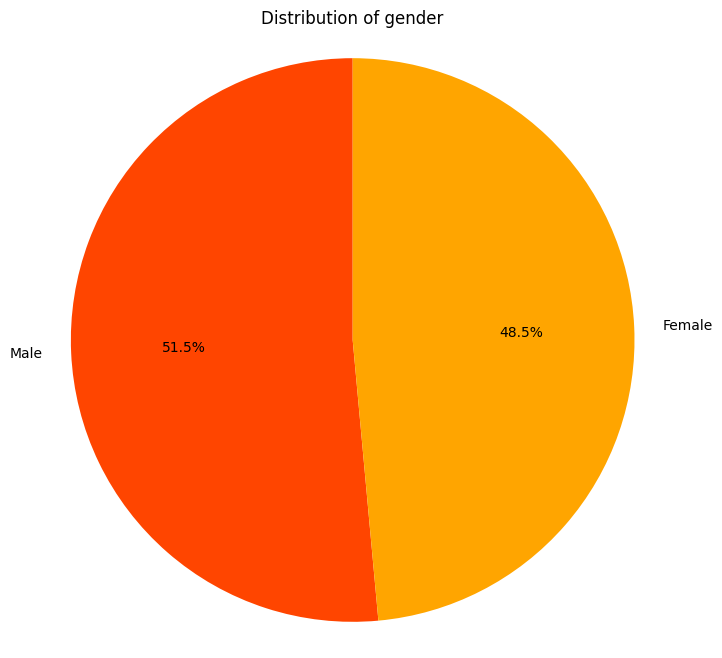

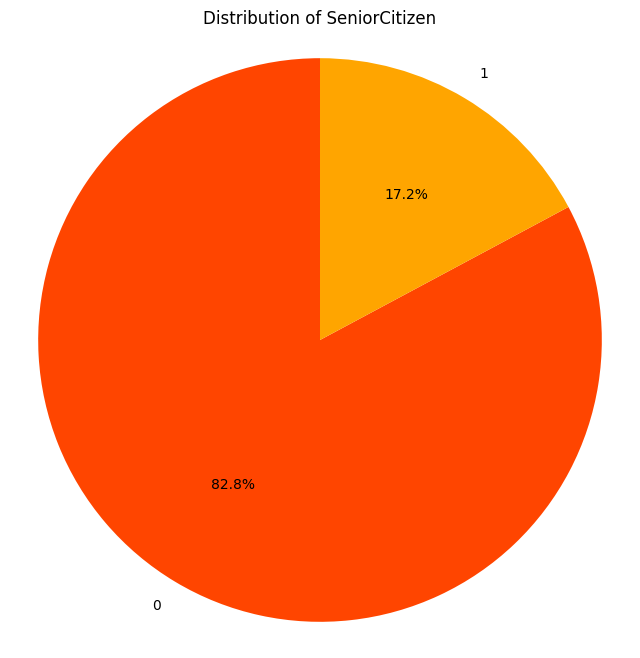

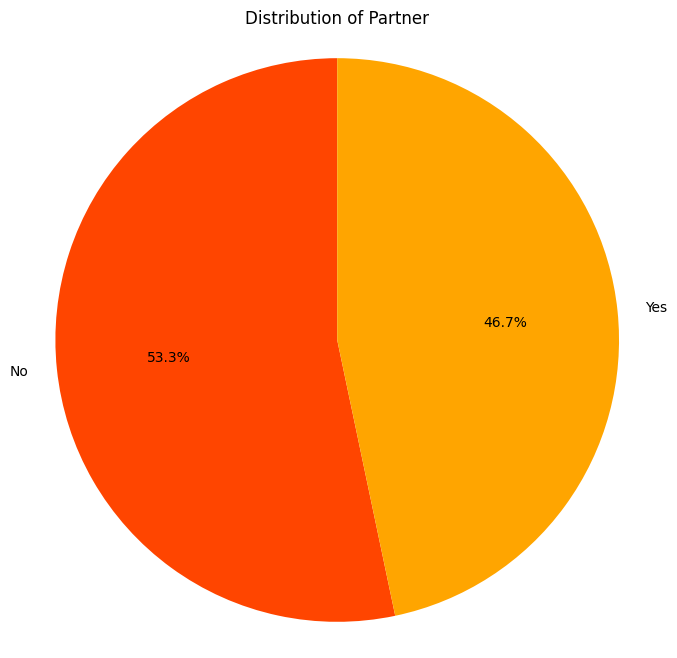

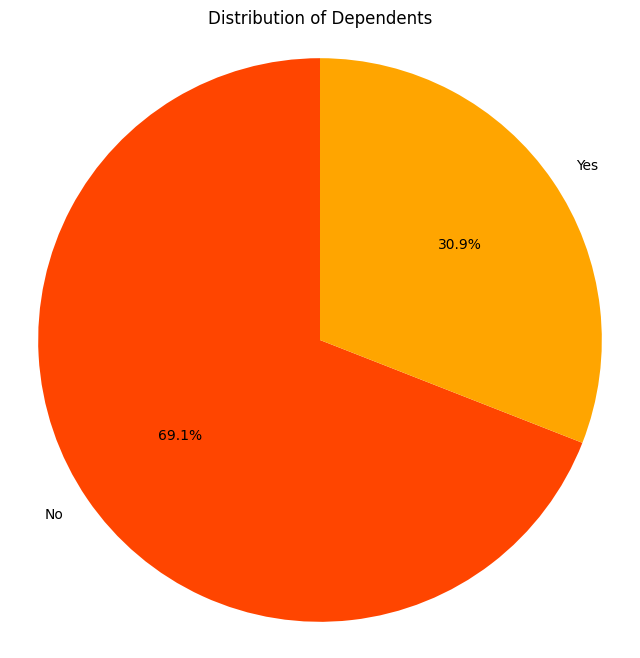

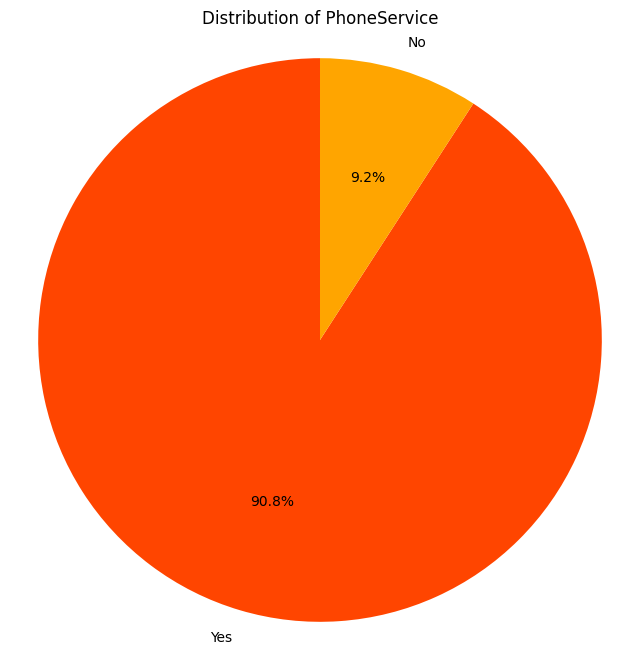

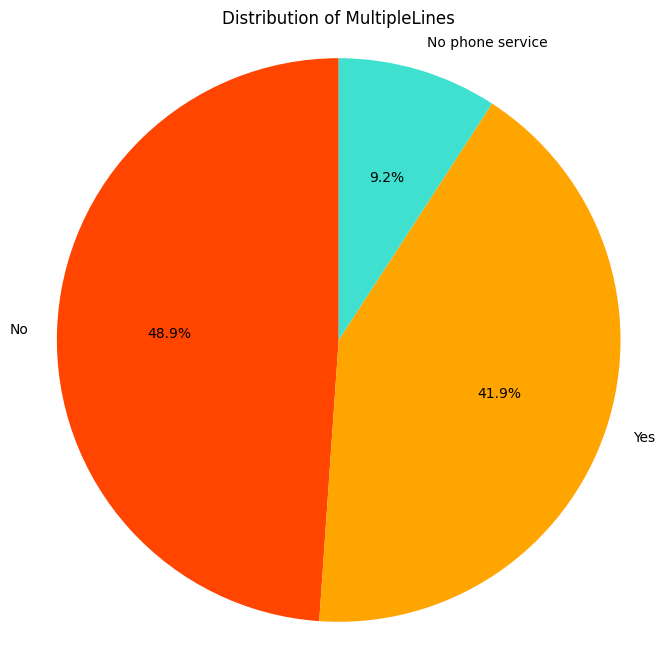

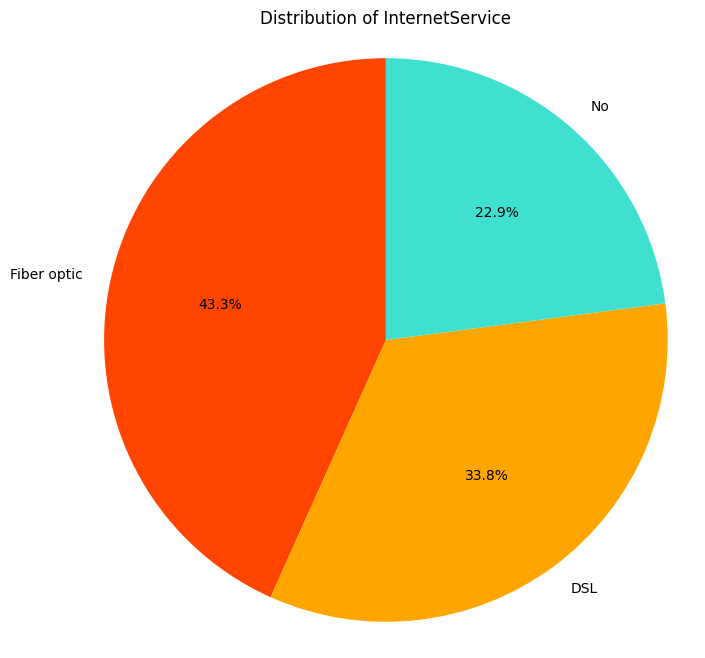

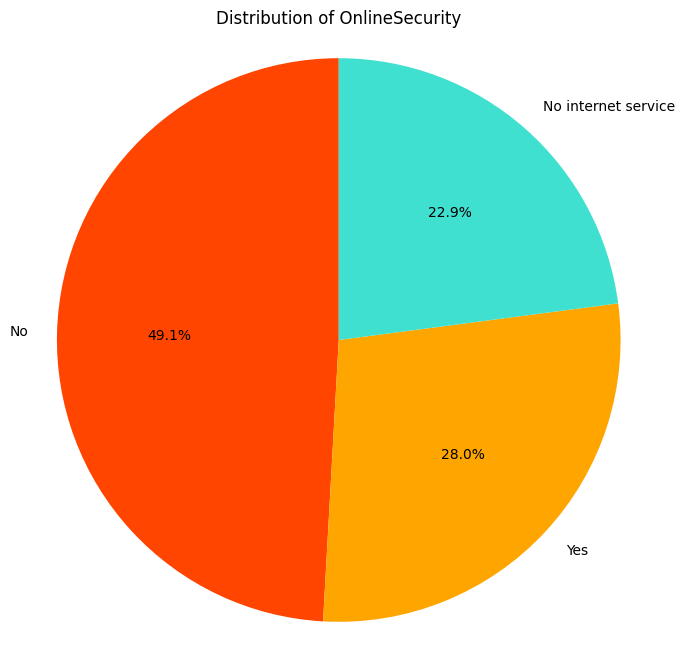

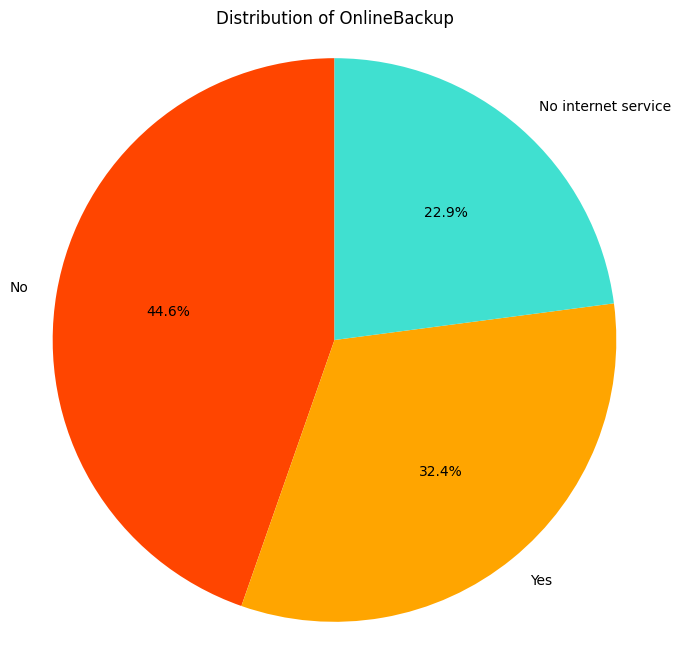

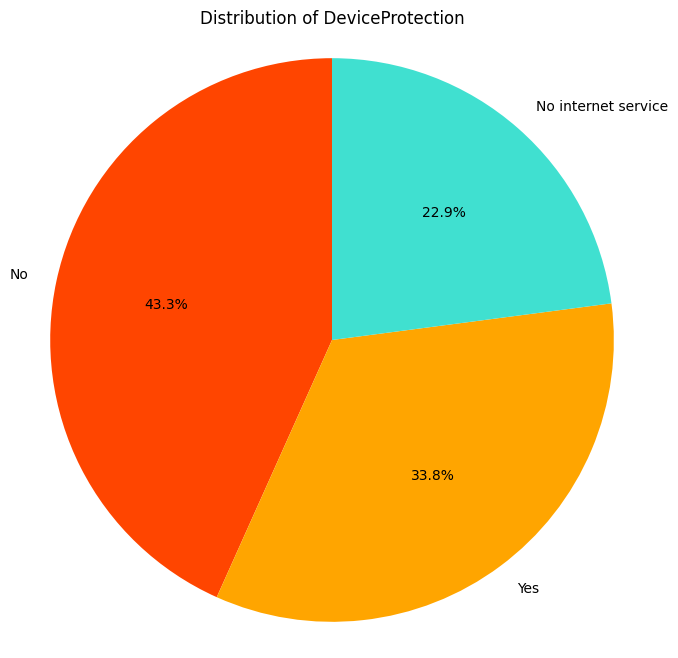

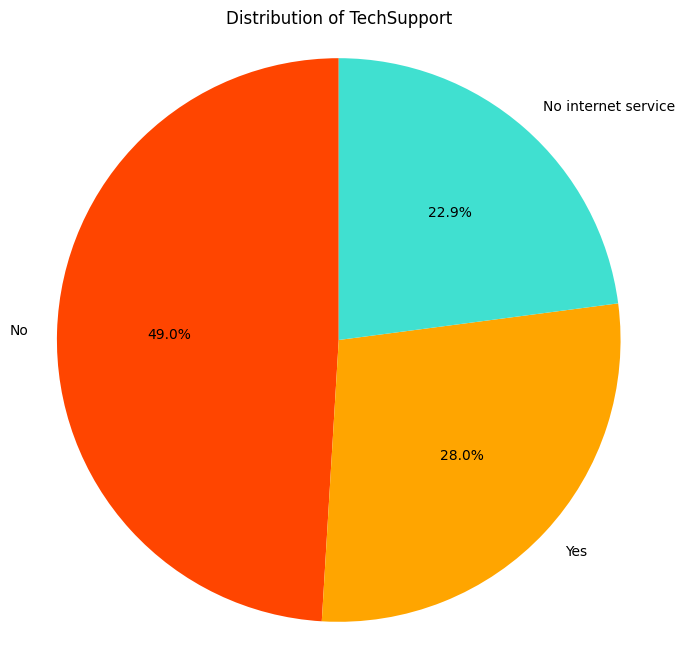

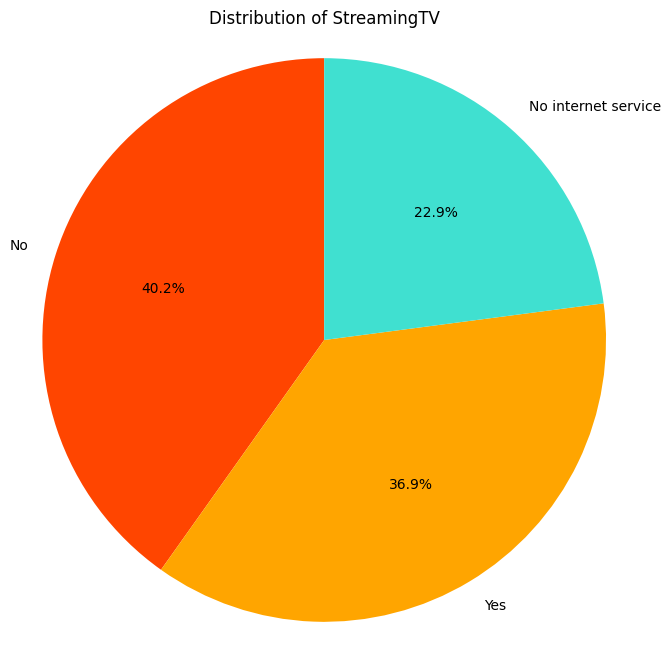

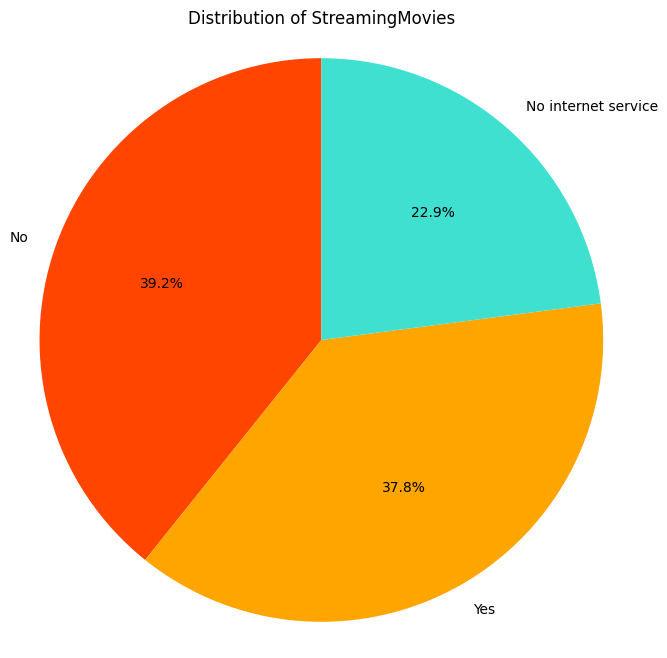

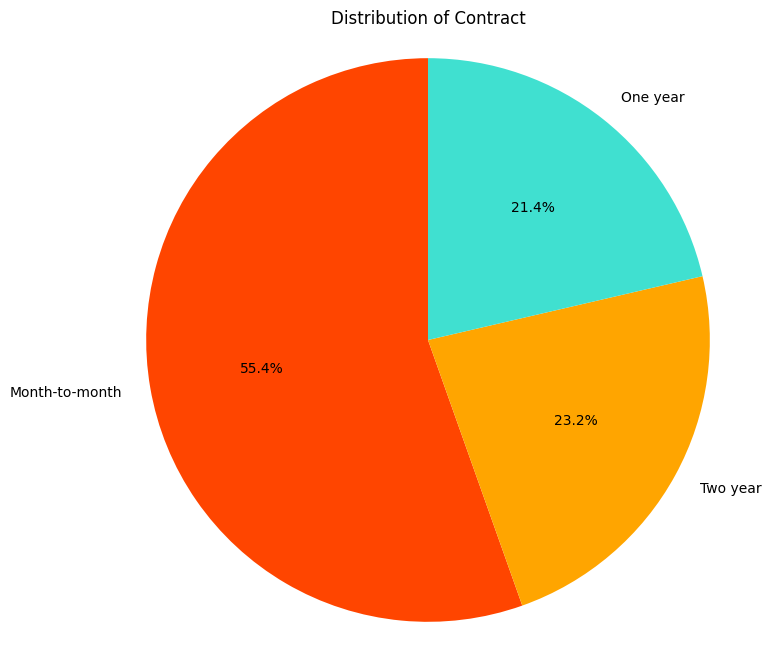

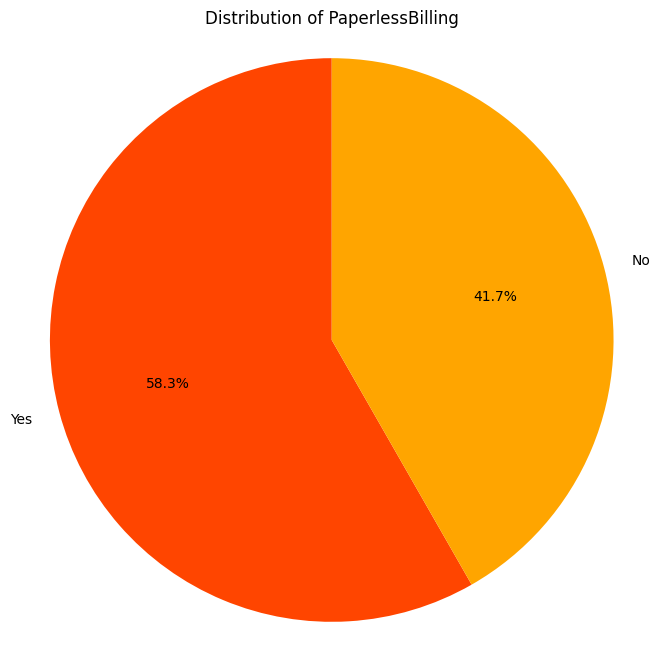

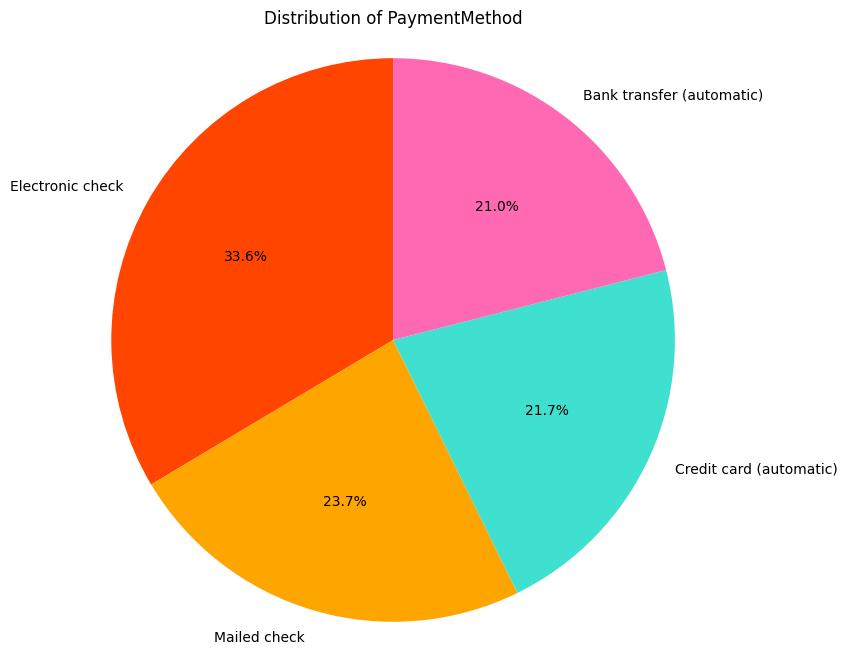

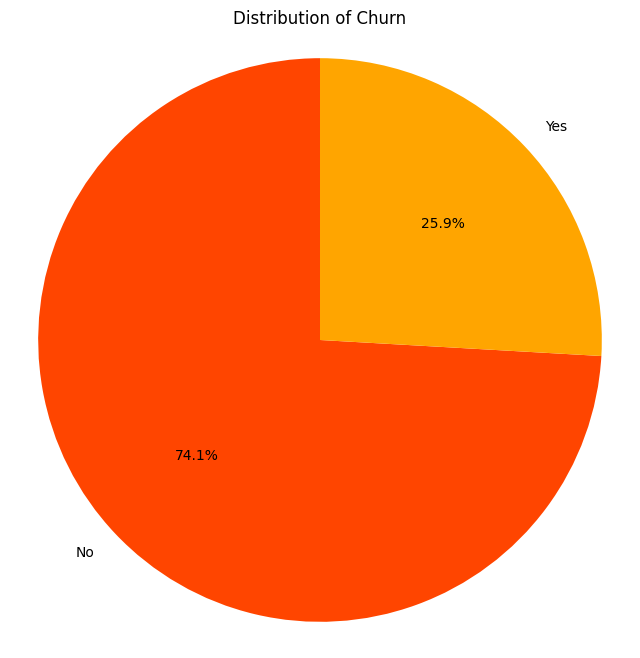

In [474]:
# Exclude 'MonthlyCharges', 'TotalCharges', and 'tenure'
columns_to_plot = [col for col in df.columns if col not in ['MonthlyCharges', 'TotalCharges', 'tenure']]

# Iterate through the selected columns
for col in columns_to_plot:
  value_counts = df[col].value_counts()

  # Create the pie chart
  plt.figure(figsize=(8, 8))
  colors = ['#FF4500', '#FFA500', '#40E0D0', '#FF69B4']
  plt.pie(value_counts, labels=value_counts.index,colors=colors, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribution of {col}')
  plt.axis('equal')
  plt.show()


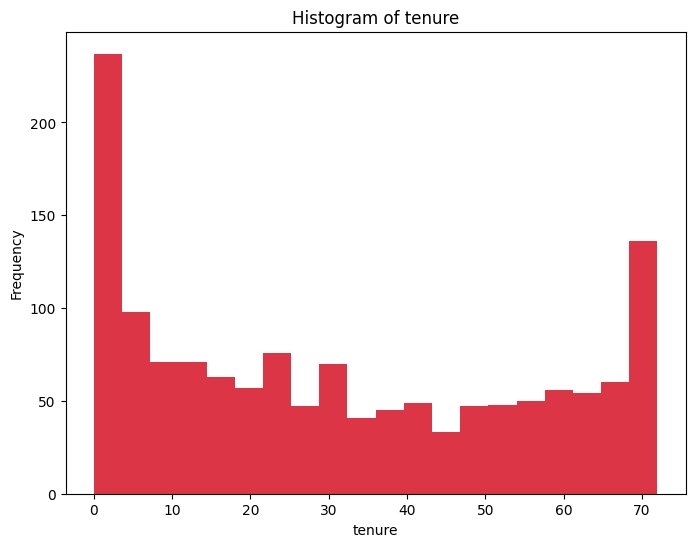

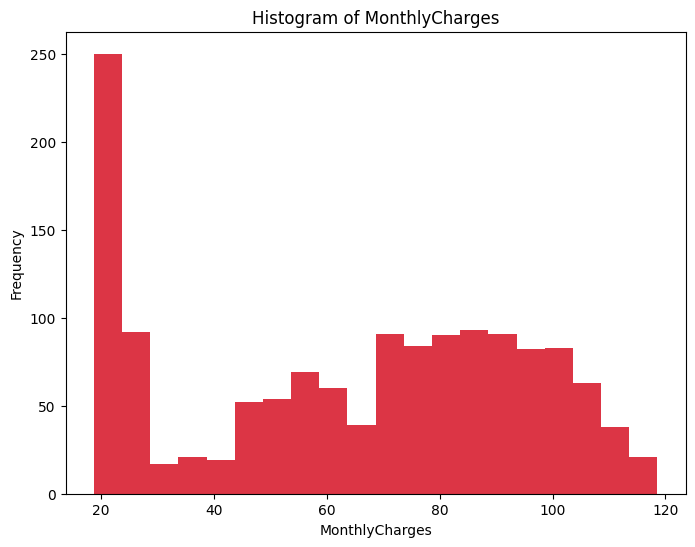

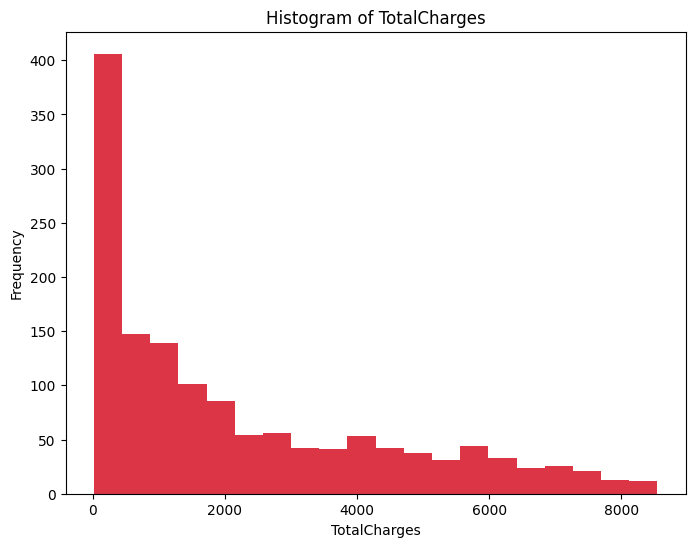

In [475]:
# Select numerical columns excluding 'SeniorCitizen'
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = [col for col in numerical_cols if col != 'SeniorCitizen']

# Plot histograms for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.hist(df[col], bins=20, color='#DC3545')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.show()


<ipython-input-476-654938e30342>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='#40E0D0')


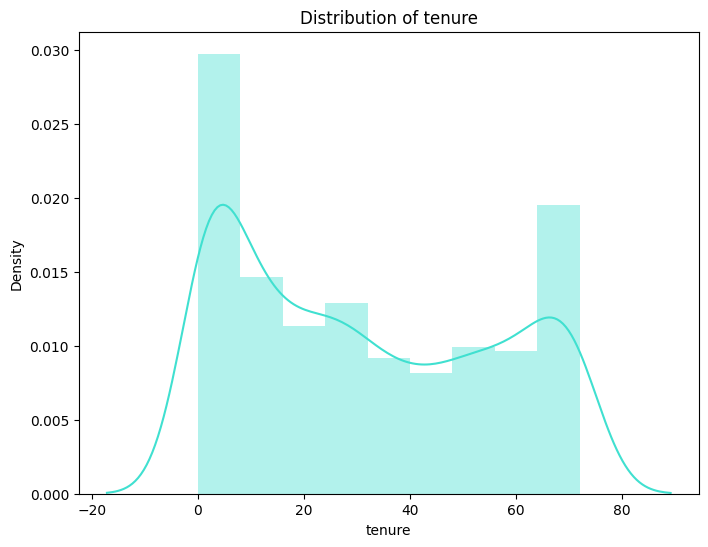

<ipython-input-476-654938e30342>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='#40E0D0')


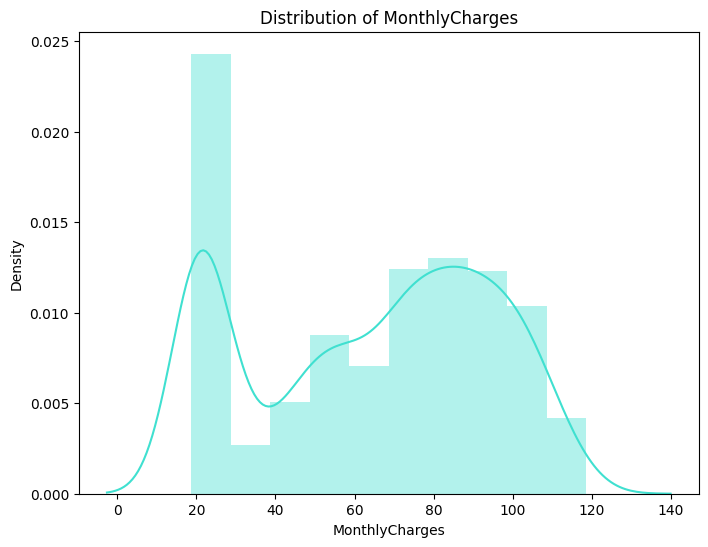

<ipython-input-476-654938e30342>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='#40E0D0')


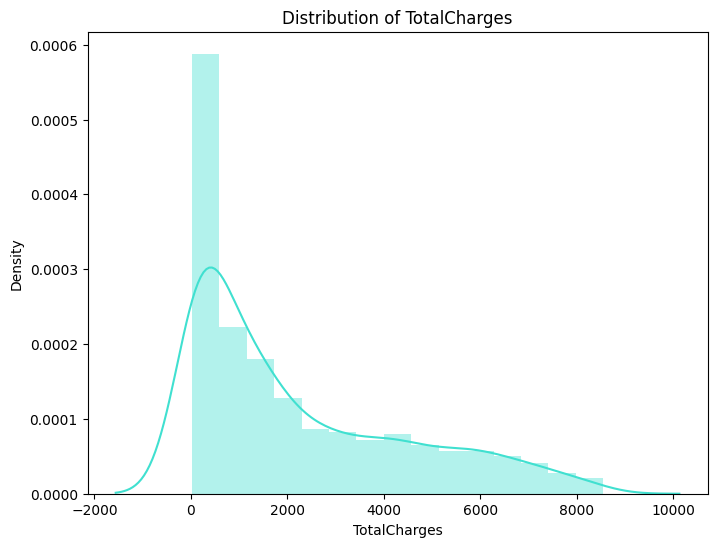

In [476]:
# Plot distribution plots for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.distplot(df[col], color='#40E0D0')
  plt.xlabel(col)
  plt.title(f'Distribution of {col}')
  plt.show()


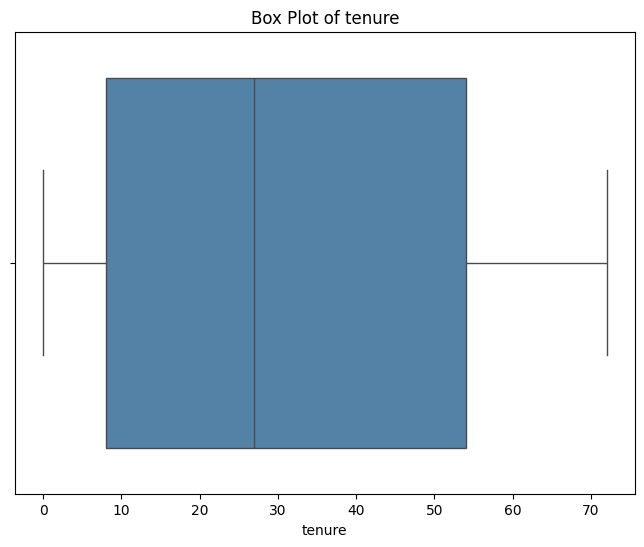

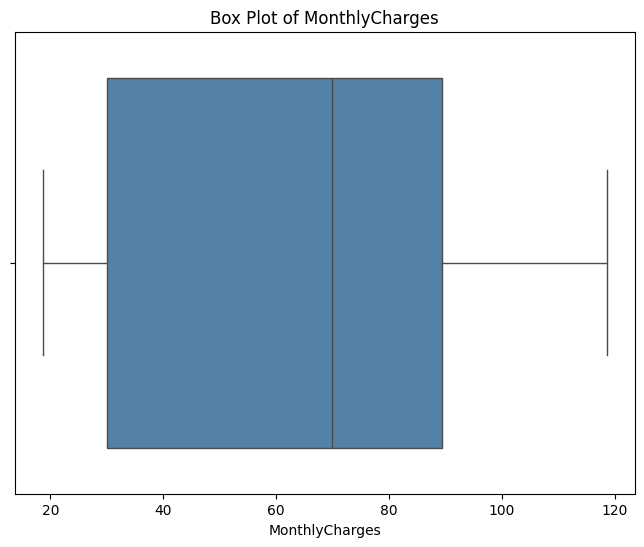

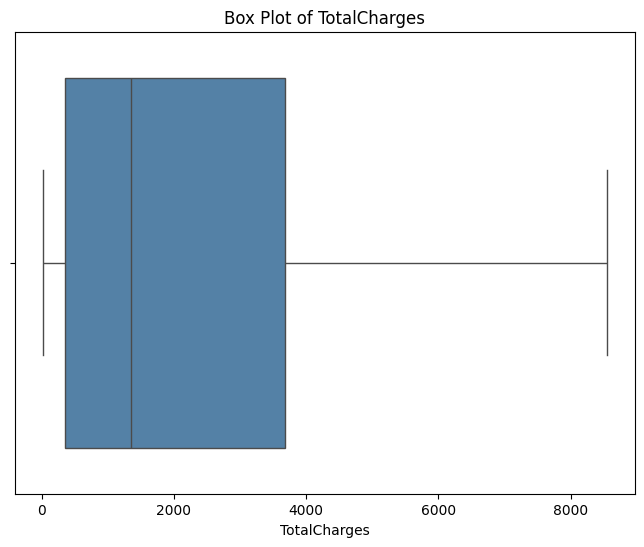

In [477]:
# Plot box plots for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col], color='#4682B4')
  plt.xlabel(col)
  plt.title(f'Box Plot of {col}')
  plt.show()


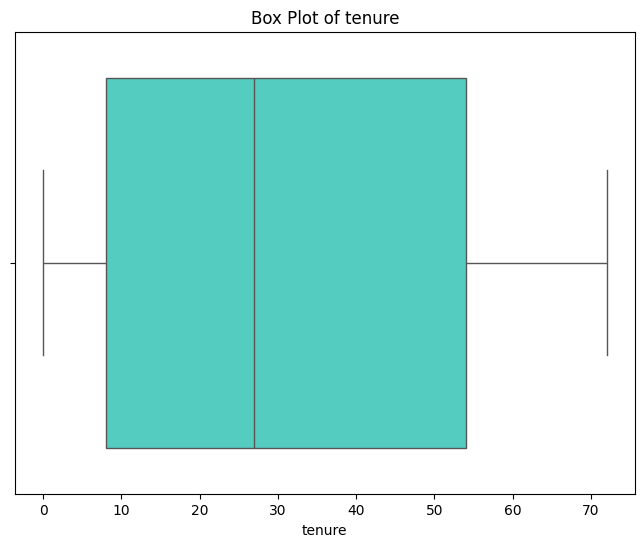

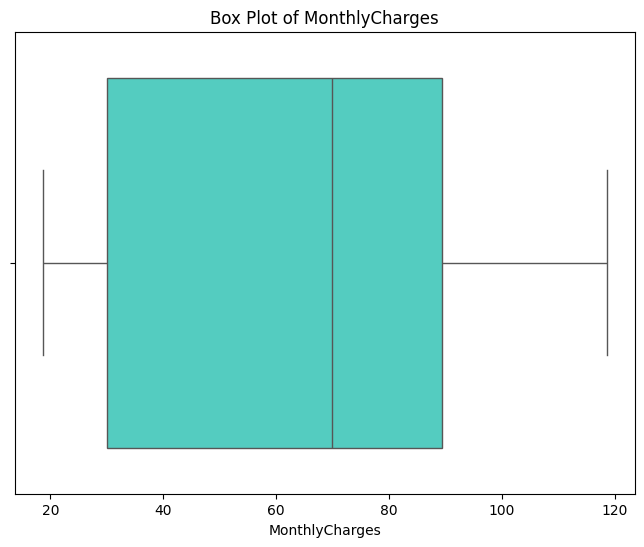

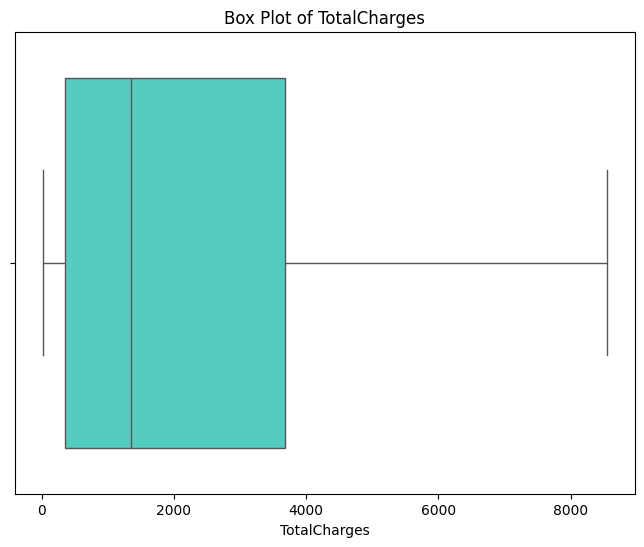

In [478]:
# Select numerical columns excluding 'SeniorCitizen'
numerical_cols_t = df_test.select_dtypes(include=np.number).columns
numerical_cols_t = [col for col in numerical_cols if col != 'SeniorCitizen']

# Plot box plots for numerical columns
for col in numerical_cols_t:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col], color='#40E0D0')
  plt.xlabel(col)
  plt.title(f'Box Plot of {col}')
  plt.show()

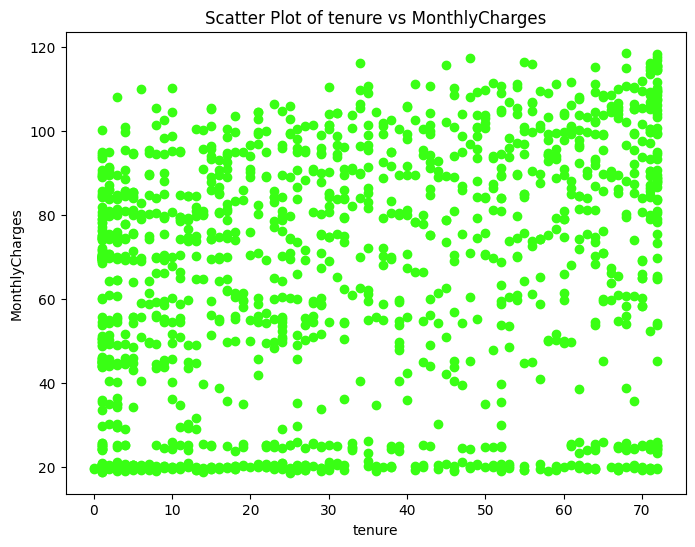

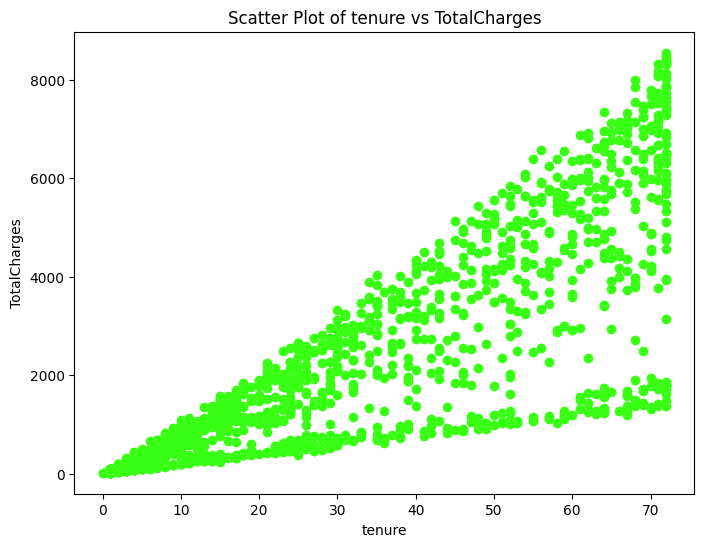

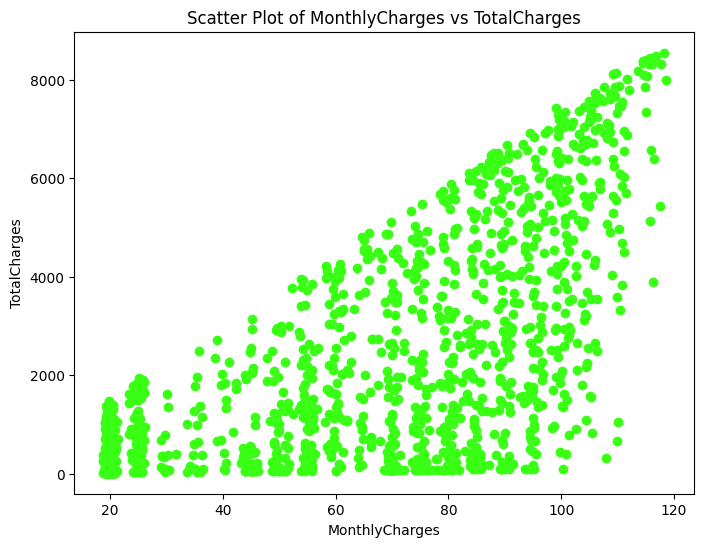

In [479]:
# Create scatter plots for pairs of numerical columns
for i in range(len(numerical_cols)):
  for j in range(i + 1, len(numerical_cols)):
    col1 = numerical_cols[i]
    col2 = numerical_cols[j]
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col1], df[col2], color='#39FF14')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()


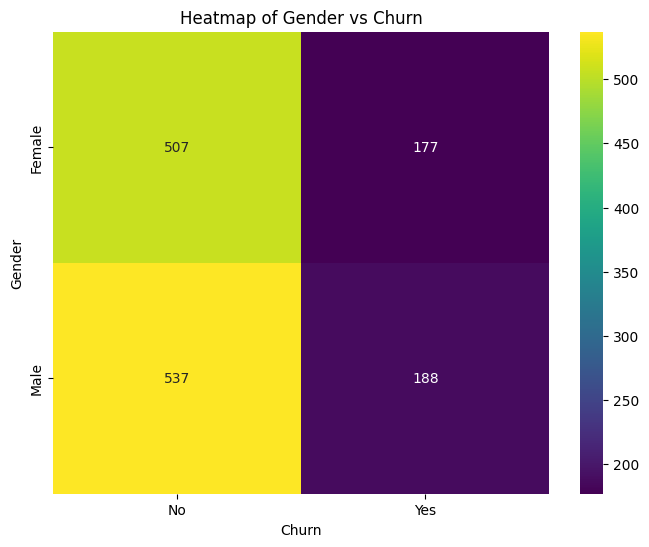

In [480]:
# Create a contingency table
gender_churn_table = pd.crosstab(df['gender'], df['Churn'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gender_churn_table, annot=True, fmt="d", cmap="viridis")
plt.title("Heatmap of Gender vs Churn")
plt.xlabel("Churn")
plt.ylabel("Gender")
plt.show()


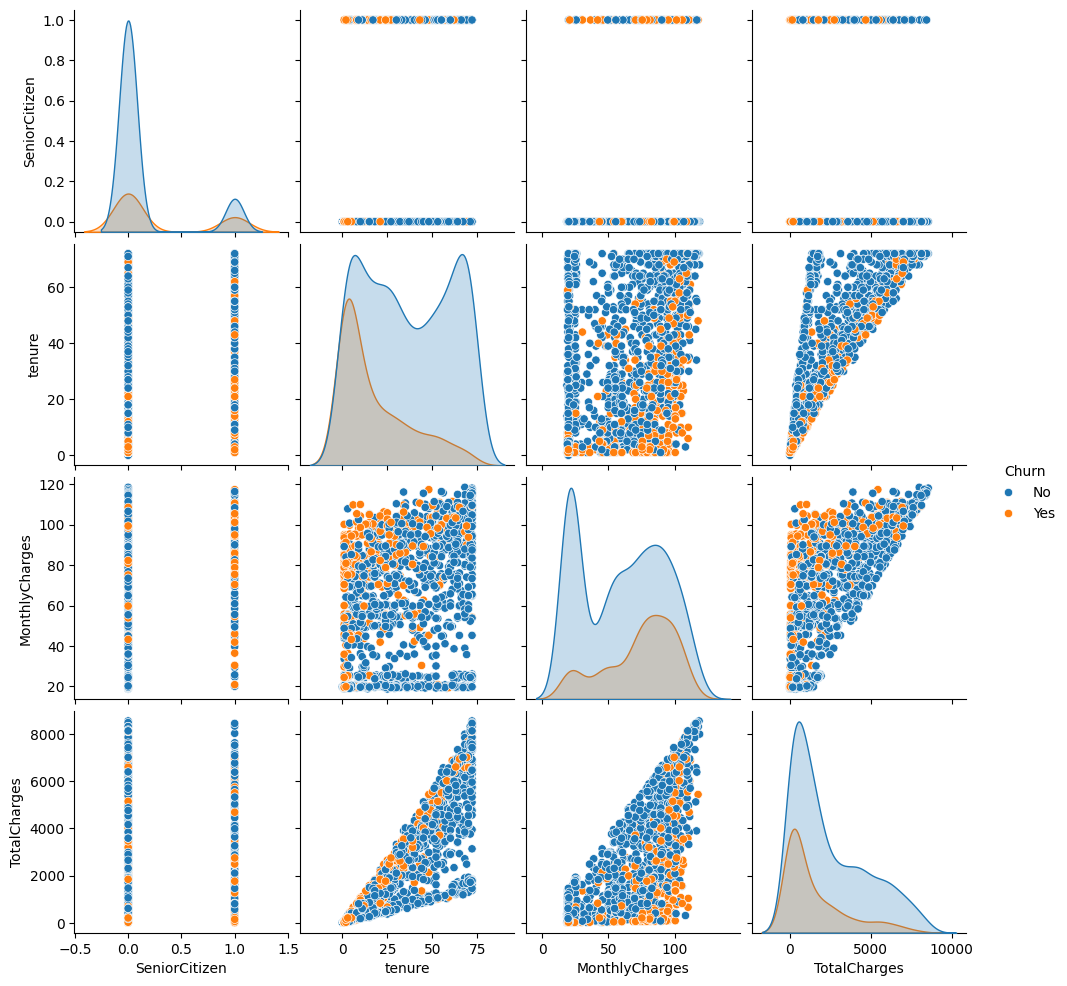

In [481]:
sns.pairplot(df, hue='Churn')
plt.show()


In [482]:
# Calculate the total charge per month
df['ChargePerMonth'] = df['TotalCharges'] / df['tenure']
df_test['ChargePerMonth'] = df_test['TotalCharges'] / df_test['tenure']

# Create a new feature for the interaction between tenure and monthly charges
df['TenureMonthlyCharges'] = df['tenure'] * df['MonthlyCharges']
df_test['TenureMonthlyCharges'] = df_test['tenure'] * df_test['MonthlyCharges']

# Create a new feature for the ratio of total charges to monthly charges
df['TotalMonthlyChargeRatio'] = df['TotalCharges'] / df['MonthlyCharges']
df_test['TotalMonthlyChargeRatio'] = df_test['TotalCharges'] / df_test['MonthlyCharges']

# Create a new feature for the difference between total charges and monthly charges
df['TotalMonthlyChargeDiff'] = df['TotalCharges'] - df['MonthlyCharges']
df_test['TotalMonthlyChargeDiff'] = df_test['TotalCharges'] - df_test['MonthlyCharges']

In [483]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargePerMonth,TenureMonthlyCharges,TotalMonthlyChargeRatio,TotalMonthlyChargeDiff
0,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,81.20,3292.30,No,82.307500,3248.0,40.545567,3211.10
1,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,No,...,One year,No,Electronic check,78.85,876.75,No,73.062500,946.2,11.119214,797.90
2,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,...,One year,Yes,Electronic check,100.00,4211.55,Yes,97.943023,4300.0,42.115500,4111.55
3,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,...,Two year,Yes,Electronic check,118.20,8547.15,No,118.710417,8510.4,72.310914,8428.95
4,Female,0,No,No,10,No,No phone service,DSL,No,Yes,...,Month-to-month,No,Electronic check,36.25,374.00,No,37.400000,362.5,10.317241,337.75


In [484]:
# Select numerical columns excluding 'SeniorCitizen'
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = [col for col in numerical_cols if col != 'SeniorCitizen']

# Initialize StandardScaler
scaler = StandardScaler()

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of each column
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].mean())

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [485]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [486]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Initialize OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder # import the OrdinalEncoder class
ordinal_encoder = OrdinalEncoder() # create an instance of the OrdinalEncoder class

# Apply LabelEncoder to categorical columns
for col in categorical_cols:
  if col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    df[col] = label_encoder.fit_transform(df[col])
    df_test[col] = label_encoder.transform(df_test[col])
  else:
    df[col] = ordinal_encoder.fit_transform(df[col].values.reshape(-1, 1))
    df_test[col] = ordinal_encoder.transform(df_test[col].values.reshape(-1, 1))

In [487]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargePerMonth,TenureMonthlyCharges,TotalMonthlyChargeRatio,TotalMonthlyChargeDiff
0,1,0,1,1,0.352533,1,2.0,1.0,0.0,0.0,...,0.0,1,2.0,0.571552,0.481588,0,0.609732,0.462475,0.374348,0.478119
1,0,0,1,0,-0.799089,1,2.0,0.0,2.0,0.0,...,1.0,0,2.0,0.493922,-0.595550,0,0.304211,-0.565877,-0.832715,-0.607615
2,1,0,0,0,0.475921,1,2.0,1.0,0.0,0.0,...,1.0,1,2.0,1.192589,0.891498,1,1.126442,0.932467,0.438746,0.883245
3,1,0,0,0,1.668673,1,2.0,1.0,2.0,2.0,...,2.0,1,2.0,1.793806,2.824821,0,1.812746,2.813506,1.677356,2.825706
4,0,0,0,0,-0.881348,0,1.0,0.0,0.0,2.0,...,0.0,0,2.0,-0.913321,-0.819736,0,-0.874334,-0.826651,-0.865612,-0.814643


In [488]:
df.shape

(1409, 24)

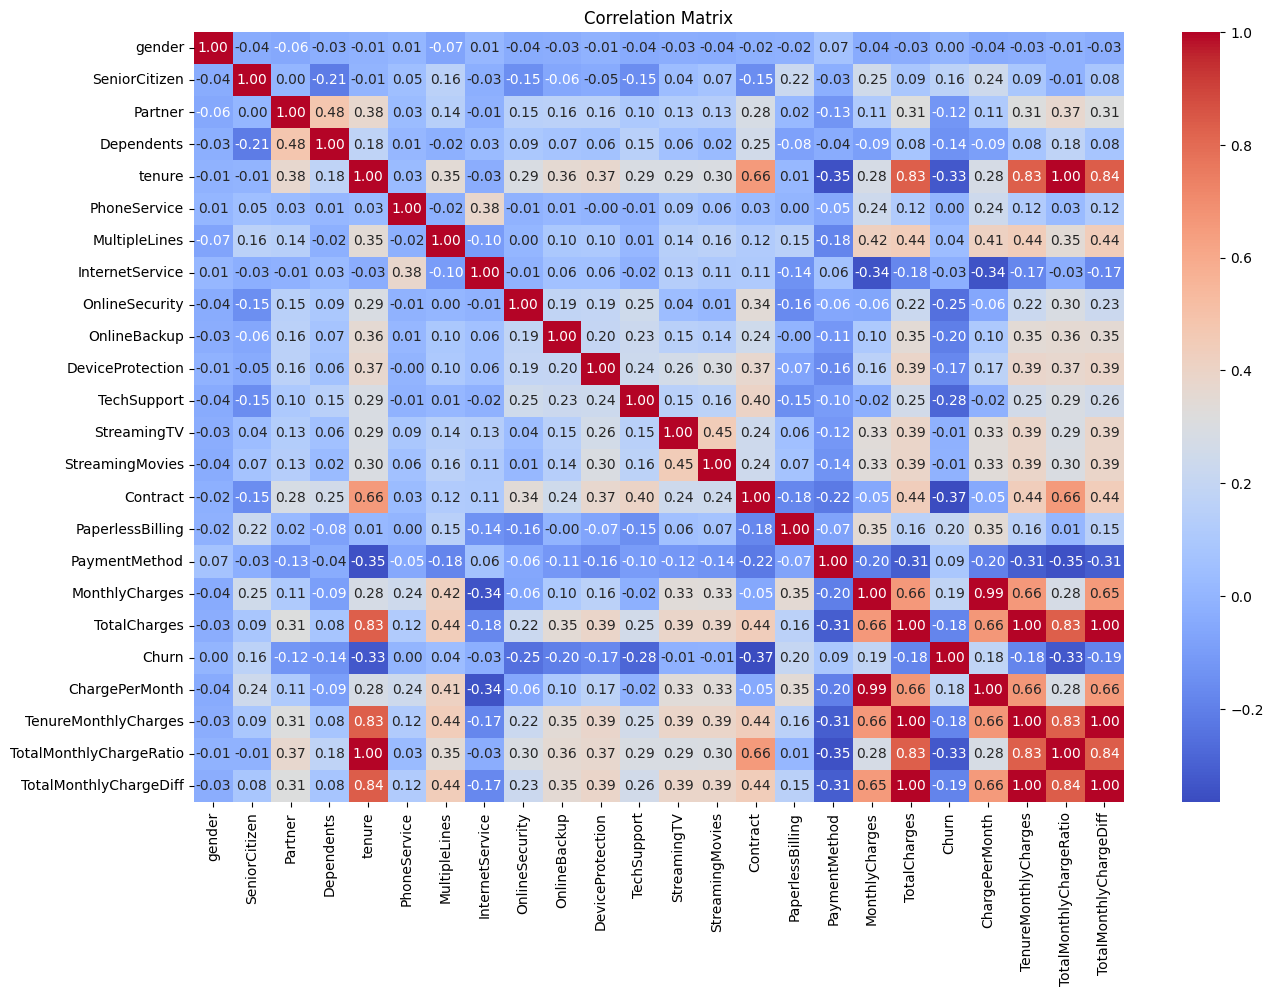

In [489]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [490]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train = X
y_train = y
X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

## **Model Development & Model Fine-Tuning:**

LogisticRegression Model

In [491]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [492]:
y_pred = model.predict(X_test)

In [493]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1044
           1       0.68      0.51      0.58       365

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



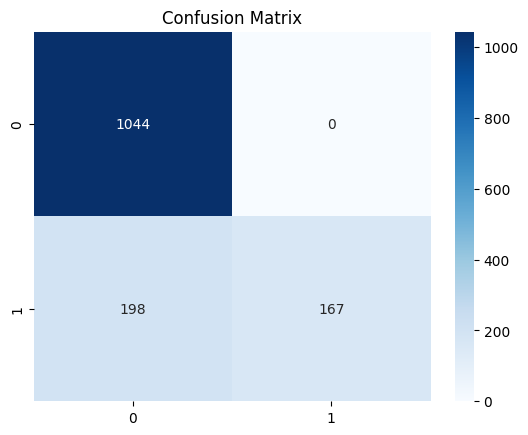

In [523]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Tune LogisticRegression Model

In [495]:
#use gridsearch for hyperparameter tuning
#define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] #REGULARISATION STRENGTGH
              ,'penalty': ['l1', 'l2'] #type of regularisation
              ,'solver': ['liblinear', 'saga'] #SOLVER
              }
#create logistic regression object
logreg = LogisticRegression(max_iter=1000)
#perform gridsearch
grid_search = GridSearchCV(logreg, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
#print best parameters
print("Best parameters: ", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [496]:
best_logreg_mod = LogisticRegression(C=0.1,penalty='l2', solver='saga')
best_logreg_mod.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='saga')

In [497]:
best_y_pred = best_logreg_mod.predict(X_test)

In [498]:
print(classification_report(y_test, best_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1044
           1       0.68      0.49      0.57       365

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.80      0.81      0.80      1409



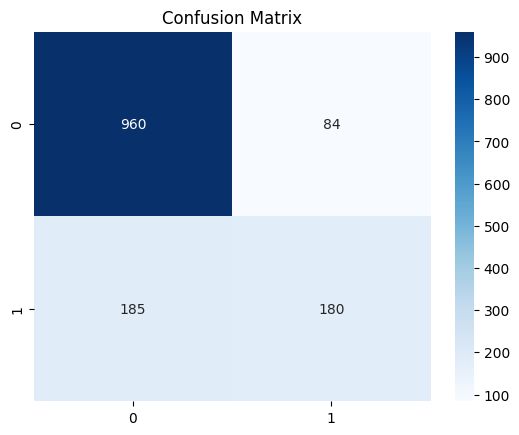

In [524]:
conf_mat = confusion_matrix(y_test, best_y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

KNN

In [500]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [501]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1044
           1       1.00      0.46      0.63       365

    accuracy                           0.86      1409
   macro avg       0.92      0.73      0.77      1409
weighted avg       0.88      0.86      0.84      1409



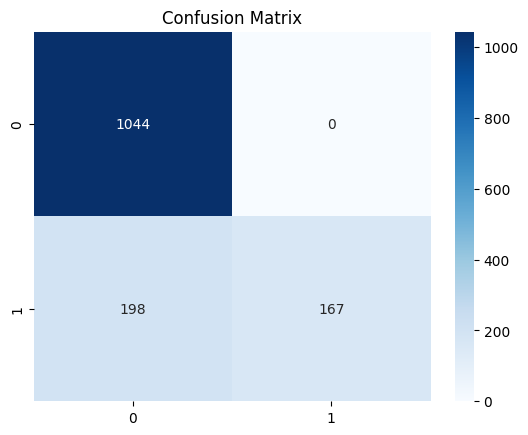

In [525]:
conf_mat = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

KNN Tuning

In [503]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'uniform'}


In [504]:
best_knn = KNeighborsClassifier(n_neighbors=28, weights='uniform', metric='manhattan')
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=28)

In [505]:
knn_y_pred = best_knn.predict(X_test)

In [506]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1044
           1       0.67      0.54      0.60       365

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



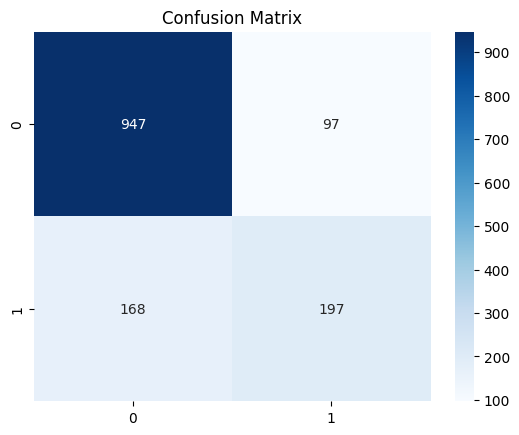

In [526]:
conf_mat = confusion_matrix(y_test,knn_y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Decision Tree

In [508]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [509]:
dt_pred = dt_model.predict(X_test)

In [510]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       365

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



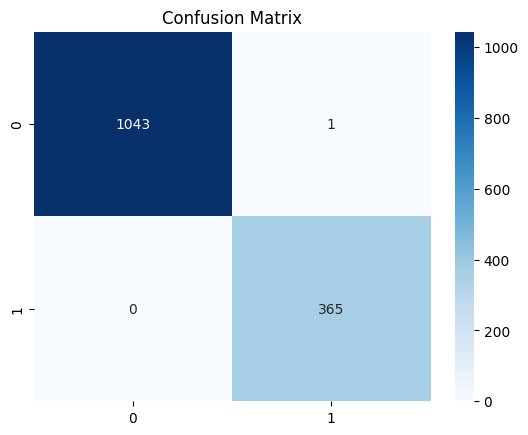

In [527]:
conf_mat = confusion_matrix(y_test, dt_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

DecisionTree Tuning

In [512]:
tree = DecisionTreeClassifier()

# Set up the parameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Perform grid search
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Decision Tree:", grid_search.best_params_)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [513]:
dtbest_model = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=2,min_samples_split=2)
dtbest_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

In [514]:
dtbest_pred = dtbest_model.predict(X_test)

In [515]:
print(classification_report(y_test,dtbest_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1044
           1       0.87      0.74      0.80       365

    accuracy                           0.90      1409
   macro avg       0.89      0.85      0.87      1409
weighted avg       0.90      0.90      0.90      1409



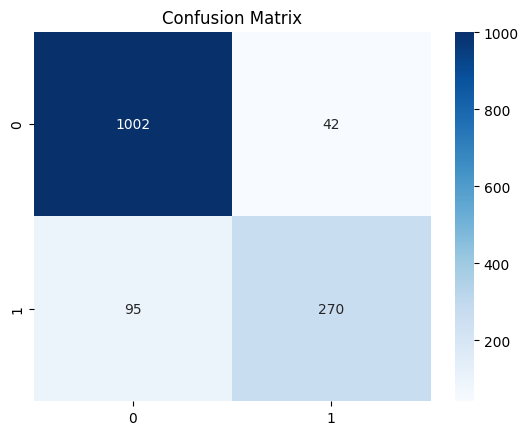

In [528]:
conf_mat = confusion_matrix(y_test, dtbest_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Random Forest

In [517]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       365

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

[[1043    1]
 [   0  365]]


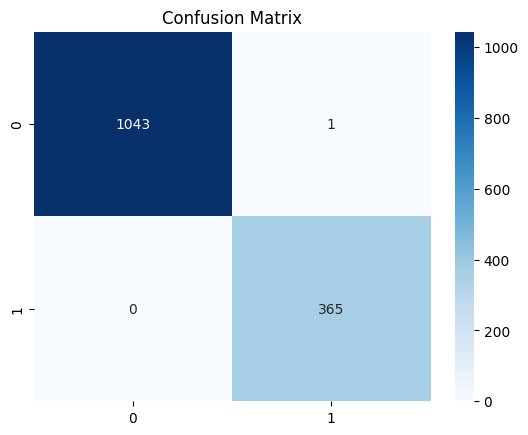

In [529]:
conf_mat = confusion_matrix(y_test, rf_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

SVM

In [519]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [520]:
svm_pred = svm_model.predict(X_test)

In [521]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      1044
           1       0.73      0.47      0.58       365

    accuracy                           0.82      1409
   macro avg       0.78      0.71      0.73      1409
weighted avg       0.81      0.82      0.80      1409



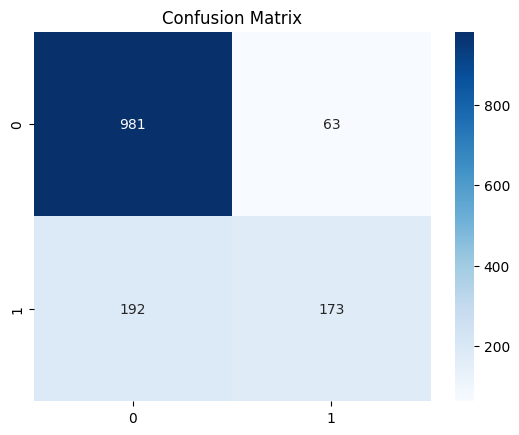

In [530]:
conf_mat = confusion_matrix(y_test, svm_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()